# MDI220
# Statistics

# Project

This is the project for the course on statistics.

You must fill this notebook and upload it on eCampus, **including figures**. Please make sure that it runs **without erros**.

You can work in teams but the final notebook, including text and code, must be **yours**. Any copy-pasting across students is strictly forbidden.

Please provide **concise answers** and **concise code**, with comments when appropriate.

## Your name: Cristian Alejandro Chávez Becerra
(there are some warnings in the code, but no errors)

## Imports

Please do **not** import any other library.

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
from scipy.stats import norm, chi2, gaussian_kde, t

In [138]:
import seaborn as sns


## Data

We consider the **daily electric power consumption** (in MW) in France in the period 2013-2023. The dataset is available on **eCampus**.

Detailed information on this dataset is available [here](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [114]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [115]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [116]:
regions = list(df.region.unique())

In [117]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [118]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [119]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [120]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

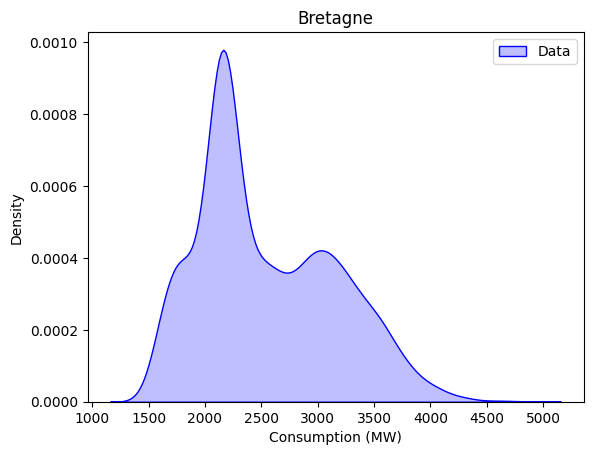

In [121]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## A. Parameter estimation

In all the project, the daily power consumptions are assumed to be i.i.d., with a Gaussian distribution.

We use the following estimators for the mean and the variance, given $n$ observations $x_1,\ldots,x_n$:
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
The corresponding estimate of the standard deviation is:
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Consider the region Bretagne.

1. Show that the estimators for the mean and the variance are unbiased.

Your answer:

$$
E ( \hat \mu ) =E( \frac 1 n \sum_{i=1}^n x_i)
=\frac 1 n E(  \sum_{i=1}^n x_i)
=\frac 1 n nE(  x_1)
=(\mu )
$$

so the estimator for the mean is unbiased

Now for the variance

$$
E(\sigma^2) = \frac 1 {n-1}\sum_{i=1}^n E[(x_i - \hat \mu)^2] = \frac 1 {n-1}\sum_{i=1}^n Var(x_i - \hat \mu) + E(x_i - \hat \mu)^2
$$

$$
= \frac 1 {n-1}\sum_{i=1}^n \frac{n-1}{n} \sigma^2 + 0
$$

$$
E(\sigma^2) = \frac 1 {n-1}\sum_{i=1}^n \frac{n-1}{n} \sigma^2 = \sigma^2
$$

So that the estimator for the variance is unbiased

2. Give the values obtained for the mean and the standard deviation using these estimators.

In [122]:
region = "Bretagne"
df_region = df[df.region == region]

consumption = list(df_region.consumption)

def average():
  sumi = 0
  for value in consumption:
    sumi += value
  return (sumi/len(consumption))

average = average()

def standardDeviation():
  sumi = 0
  for value in consumption:
    sumi += (value - average)**2
  return ((sumi/(len(consumption)-1))**(1/2))

standardDeviation = standardDeviation()

print('average: ' + str(average))
print('standard deviation: ' + str(standardDeviation))

average: 2546.536155666579
standard deviation: 604.9429842099305


3. Generate new data using the corresponding Gaussian model, with the same number of samples.

In [123]:
new_data = np.random.normal(average, standardDeviation, len(consumption))
print(new_data)

[2264.55855283 2473.68399792 2580.34983304 ... 2181.70630976 2582.35992545
 2521.4484002 ]


4. Plot the *kde* (kernel density estimate) of real data and the *kde* of generated data on the same figure.

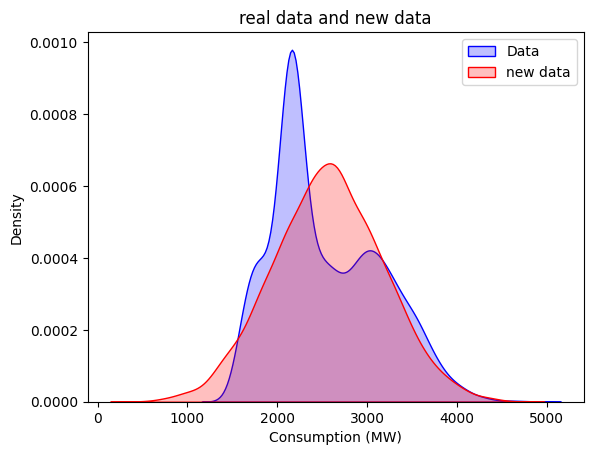

In [124]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=consumption, label="Data", color='blue', fill=True)
sns.kdeplot(new_data, label='new data', color='red', fill=True)
plt.title('real data and new data')
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

5. Do the same for the days corresponding to winter (from December 22 to March 21), after updating the model.

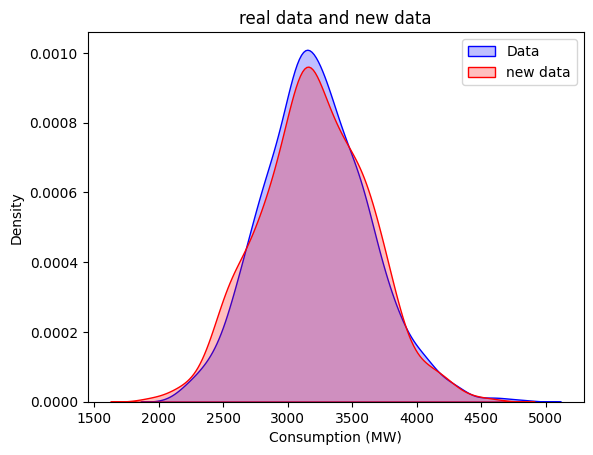

standard deviation: 408.8623309768853
average: 3215.0040733197557


In [140]:
# selection of a region
region = "Bretagne"
df_regionB = df[df.region == region]

# Assuming 'date' is in datetime format
df_regionB['date'] = pd.to_datetime(df_regionB['date'])

# Calculate the day of the year
df_regionB['day_of_year'] = df_regionB['date'].dt.dayofyear

# Define the range for winter days (from day 356 to day 80)
winter_data = df_regionB[(df_regionB['day_of_year'] >= 356) | (df_regionB['day_of_year'] <= 80)]

# Drop the 'day_of_year' column if you don't need it
winter_dataB = winter_data.drop(columns=['day_of_year'])

consumption = list(winter_dataB['consumption'])

def average():
  sumi = 0
  for value in consumption:
    sumi += value
  return (sumi/len(consumption))

average = average()

def standardDeviation():
  sumi = 0
  for value in consumption:
    sumi += (value - average)**2
  return ((sumi/(len(consumption)-1))**(1/2))

standardDeviation = standardDeviation()

new_data = np.random.normal(average, standardDeviation, len(consumption))

sns.kdeplot(data=consumption, label="Data", color='blue', fill=True)
sns.kdeplot(new_data, label='new data', color='red', fill=True)
plt.title('real data and new data')
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

print('standard deviation: ' + str(standardDeviation))
print('average: ' + str(average))






6. In which case the Gaussian model seems more appropriate?

In the case of the winter values, perhaps due to the fact that there is more use in that season and that we are taking the same season where the use is more similar instead of using data from all seasons.

## B. Goodness of fit

We would like to confirm and quantify the observation of part A.

We propose the following metric to measure the dissimilarity between two pdf $f$ and $g$ (with respect to the Lebesgue measure):
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Show that $d(f,g) \in [0,1]$, with $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure) and $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

Your answser:


I. $d(f, g) \in [0, 1]$.

For the lower bound, since $|f(x) - g(x)|$ is the absolute value then it's grater or equal to 0. So $d(f, g) \geq 0$.

For the upper bound, we know that $|f(x) +(- g(x))| \leq |f(x)| + |-g(x)|$ and since $g(x) \geq 0$ then $|f(x) +(- g(x))| \leq |f(x)| + |g(x)| = f(x) + g(x)$.  for all $x$. where:

$$
\int f(x) \, dx + \int g(x) \, dx = 1 + 1 = 2.
$$

then:

$$
d(f, g) = \frac{1}{2} \int |f(x) - g(x)| \, dx \leq \frac{1}{2} \int (f(x) + g(x)) \, dx = \frac{1}{2} \times 2 = 1.
$$

So, $d(f, g) \leq 1$.

II. $d(f,g)=0$ if and only if $f=g$ almost everywhere (for the Lebesgue measure)
if $f=g$ then $|f(x)-g(x)|=0$ so

$$ d(f,g) = \frac{1}{2} \int 0 dx = 0 $$

Now if $d(f,g)=0$ then $\frac{1}{2} \int |f(x) - g(x)| \, dx = 0 ->$ $ \int |f(x) - g(x)| \, dx = 0$ and it only happens if $f=g$


III. $d(f,g)=1$ if and only if $f$ and $g$ have disjoint supports.

if $f$ and $g$ have disjoint supports then $|f(x) - g(x)|\, dx= 2 $
so that $d(f,g)=1$

Now if $d(f,g)=1$ then $\frac{1}{2} \int |f(x) - g(x)| \, dx = 1 ->$ $ \int |f(x) - g(x)| \, dx = 2$ and it only happens if $f(x)$ and $g(x)$ have disjoint support


2. For the region Bretagne, compute the dissimilarity between the *kde* of real data and the density of the Gaussian model.

In [126]:
region = "Bretagne"
df_region = df[df.region == region]

consumptionB = df_region.consumption

def average():
  sumi = 0
  for value in consumptionB:
    sumi += value
  return (sumi/len(consumptionB))

average = average()

def standardDeviation():
  sumi = 0
  for value in consumptionB:
    sumi += (value - average)**2
  return ((sumi/(len(consumptionB)-1))**(1/2))

standardDeviation = standardDeviation()

# Calculate KDE
kde = gaussian_kde(consumptionB)

# Define points for evaluation
evaluation_points = np.linspace(min(consumptionB), max(consumptionB), len(consumptionB))

# Calculate the values
density = kde(evaluation_points)
pdf_g_values = norm.pdf(evaluation_points, average, standardDeviation)

# Calculate the absolute difference between the two PDFs
abs_diff = np.abs(density - pdf_g_values)
#calculate the integral
dissimilarity = (1/2)*np.trapz(abs_diff, evaluation_points)

print('the dissimilarity is ' + str(dissimilarity))



the dissimilarity is 0.1617828808080711


3. Do the same for the region Bretagne in winter and check your conclusion of part A.

In [127]:
# selection of a region
region = "Bretagne"
df_regionB = df[df.region == region]

# Assuming 'date' is in datetime format
df_regionB['date'] = pd.to_datetime(df_regionB['date'])

# Calculate the day of the year
df_regionB['day_of_year'] = df_regionB['date'].dt.dayofyear

# Define the range for winter days (from day 356 to day 80)
winter_data = df_regionB[(df_regionB['day_of_year'] >= 356) | (df_regionB['day_of_year'] <= 80)]

# Drop the 'day_of_year' column if you don't need it
winter_dataB = winter_data.drop(columns=['day_of_year'])

consumptionB = list(winter_dataB['consumption'])

def average():
  sumi = 0
  for value in consumptionB:
    sumi += value
  return (sumi/len(consumptionB))

average = average()

def standardDeviation():
  sumi = 0
  for value in consumptionB:
    sumi += (value - average)**2
  return ((sumi/(len(consumptionB)-1))**(1/2))

standardDeviation = standardDeviation()

# Calculate KDE
kde = gaussian_kde(consumptionB)

# Define points for evaluation
evaluation_points = np.linspace(min(consumptionB), max(consumptionB), len(consumptionB))

# Calculate the values
density = kde(evaluation_points)
pdf_g_values = norm.pdf(evaluation_points, average, standardDeviation)

# Calculate the absolute difference between the two PDFs
abs_diff = np.abs(density - pdf_g_values)
#calculate the integral
dissimilarity = (1/2)*np.trapz(abs_diff, evaluation_points)

print('the dissimilarity in winter is ' + str(dissimilarity))





the dissimilarity in winter is 0.029409939676882546


4. Do the same for all regions. Give the result as a single dataframe.

In [128]:
dissimilarity_list = []
regions_list = []

for regionk in regions :
    # selection of a region
    region = regionk
    df_regionB = df[df.region == region]

    # Assuming 'date' is in datetime format
    df_regionB['date'] = pd.to_datetime(df_regionB['date'])

    # Calculate the day of the year
    df_regionB['day_of_year'] = df_regionB['date'].dt.dayofyear

    # Define the range for winter days (from day 356 to day 80)
    winter_data = df_regionB[(df_regionB['day_of_year'] >= 356) | (df_regionB['day_of_year'] <= 80)]

    # Drop the 'day_of_year' column if you don't need it
    winter_dataB = winter_data.drop(columns=['day_of_year'])

    consumptionB = list(winter_dataB['consumption'])

    def average():
      sumi = 0
      for value in consumptionB:
        sumi += value
      return (sumi/len(consumptionB))

    average = average()

    def standardDeviation():
      sumi = 0
      for value in consumptionB:
        sumi += (value - average)**2
      return ((sumi/(len(consumptionB)-1))**(1/2))

    standardDeviation = standardDeviation()

    # Calculate KDE
    kde = gaussian_kde(consumptionB)

    # Define points for evaluation
    evaluation_points = np.linspace(min(consumptionB), max(consumptionB), len(consumptionB))

    # Calculate the values
    density = kde(evaluation_points)
    pdf_g_values = norm.pdf(evaluation_points, average, standardDeviation)

    # Calculate the absolute difference between the two PDFs
    abs_diff = np.abs(density - pdf_g_values)
    #calculate the integral
    dissimilarity = (1/2)*np.trapz(abs_diff, evaluation_points)
    dissimilarity_list.append(dissimilarity)
    regions_list.append(region)


# Create a DataFrame with the dissimilarity and the regions
df_dissimilarity = pd.DataFrame({'region': regions_list , 'dissimilarity': dissimilarity_list})
df_dissimilarity

,region,dissimilarity
0,Auvergne-Rhône-Alpes,0.038520
1,Bourgogne-Franche-Comté,0.037894
2,Bretagne,0.029410
3,Centre-Val de Loire,0.042906
4,Grand Est,0.038165
5,Hauts-de-France,0.026672
6,Normandie,0.041617
7,Nouvelle-Aquitaine,0.053124
8,Occitanie,0.059935
9,Pays de la Loire,0.038166


5. Which region is best fitted by a Gaussian model in winter?

In [129]:
# Find the minimum value
min_value = min(dissimilarity_list)

# Find the index of the minimum value
min_index = dissimilarity_list.index(min_value)

regionw = regions_list[min_index]
print(regionw)


Hauts-de-France


6. For this region and this season, plot the *kde* of real data and the *kde* of generated data on the same figure, as in part A.

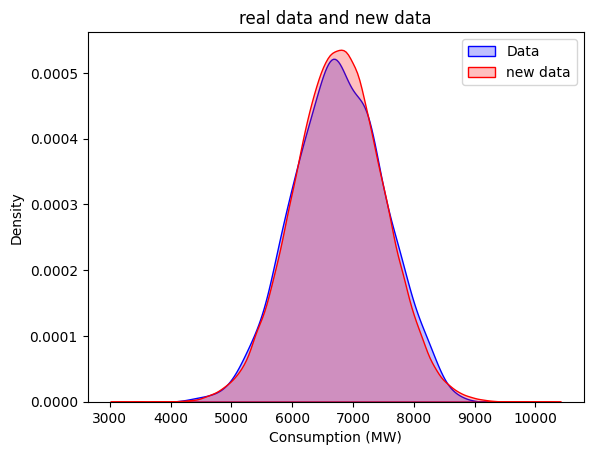

In [130]:
# selection of a regon
region = regionw
df_regionB = df[df.region == region]

# Assuming 'date' is in datetime format
df_regionB['date'] = pd.to_datetime(df_regionB['date'])

# Calculate the day of the year
df_regionB['day_of_year'] = df_regionB['date'].dt.dayofyear

# Define the range for winter days (from day 356 to day 80)
winter_data = df_regionB[(df_regionB['day_of_year'] >= 356) | (df_regionB['day_of_year'] <= 80)]

# Drop the 'day_of_year' column if you don't need it
winter_dataB = winter_data.drop(columns=['day_of_year'])

consumptionB = list(winter_dataB['consumption'])


consumption = consumptionB

def average():
  sumi = 0
  for value in consumption:
    sumi += value
  return (sumi/len(consumption))

average = average()

def standardDeviation():
  sumi = 0
  for value in consumption:
    sumi += (value - average)**2
  return ((sumi/(len(consumption)-1))**(1/2))

standardDeviation = standardDeviation()

new_data = np.random.normal(average, standardDeviation, 110000)

sns.kdeplot(data=consumption, label="Data", color='blue', fill=True)
sns.kdeplot(new_data, label='new data', color='red', fill=True)
plt.title('real data and new data')
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

## C. Bayesian statistics

We would like to include prior knowledge on the estimation, using Bayesian statistics.

Consider the region Bretagne in winter. We focus on the mean $\mu$, assuming the standard deviation is known and equal to $\sigma=400$MW. We assume a Gaussian prior on $\mu$ with mean $\mu_0=3500$MW and standard deviation $\sigma_0=500$MW.

1. Give the posterior distribution of $\mu$, using the parameters $\sigma$, $\mu_0$, $\sigma_0$ and the $n$ observations $x_1,\ldots,x_n$.

Your answer:

$$
 p_{\theta}(x|\theta) = \prod_{i=1}^{n} \frac{1}{{\sigma \sqrt{2\pi}}} e^{-\frac{{(x_{i} - \theta)^2}}{{2\sigma^2}}} \propto e^{\sum_{i=1}^{n} -\frac{{(x_{i} - \theta)^2}}{{2\sigma^2}}}
$$

$$
\pi(\theta) = \frac{1}{{\sigma_{0} \sqrt{2\pi}}} e^{-\frac{{(\theta - \mu_0)^2}}{{2\sigma_{0}^2}}}
$$

$$
\pi(\theta|x) \propto p_{\theta}(x|\theta)\pi(\theta)
$$

$$
-> \pi(\theta|x) \propto e^{-\frac{1}{2}\frac{{(\theta - \mu_0)^2}}{{\sigma_{0}^2}}}  e^{-\frac{1}{2}\sum_{i=1}^{n} \frac{{(x_{i} - \theta)^2}}{{\sigma^2}}}
$$

$$
= e^{-\frac{1}{2}(\frac{{(\theta - \mu_0)^2}}{{\sigma_{0}^2}} + {\sum_{i=1}^{n} \frac{{(x_{i} - \theta)^2}}{{\sigma^2}}})} = e^{-\frac{1}{2}M}$$

$$
M = {-\frac{1}{2}(\frac{{(\theta - \mu_0)^2}}{{\sigma_{0}^2}} + {\sum_{i=1}^{n} \frac{{(x_{i} - \theta)^2}}{{\sigma^2}}})}
$$
$$
= ({\sum_{i=1}^{n} \frac{x_{i}^2}{\sigma^2} - \frac{2\theta}{\sigma^2}{\sum_{i=1}^{n} x_{i}}} + \frac{n\theta^2}{\sigma^2}) + (\frac{\theta^2}{\sigma_{0}^2} + \frac{-2\theta^2\mu_{0}}{\sigma_{0}^2} + \frac{\mu_{0}}{\sigma_{0}^2})
$$

$$
=\theta^2(\frac{n}{\sigma^2} + \frac{1}{\sigma_{0}^2}) - 2\theta(\frac{\sum_{i=1}^{n} x_{i}}{\sigma^2} + \frac{\mu_{0}}{\sigma_{0}^2}) + (\frac{\sum_{i=1}^{n} x_{i}^2}{\sigma^2} + \frac{\mu_{0}^2}{\sigma_{0}^2})
$$

$$
= \theta^2(\frac{1}{\sigma_{1}^2}) + -2\theta(\frac{\mu_{1}}{\sigma_{1}^2}) + (\frac{\sum_{i=1}^{n} x_{i}^2}{\sigma^2} + \frac{\mu_{0}^2}{\sigma_{0}^2})
$$

$$
=\frac{(\theta-\mu_{1})^2}{\sigma_{1}^2}-\frac{1}{\sigma_{1}^2}(\frac{\sum_{i=1}^{n} x_{i}}{\sigma^2} + \frac{\mu_{0}}{\sigma_{0}^2})^2 + (\frac{\sum_{i=1}^{n} x_{i}^2}{\sigma^2} + \frac{\mu_{0}^2}{\sigma_{0}^2})
$$

$$
\propto \frac{(\theta-\mu_{1})^2}{\sigma_{1}^2}
$$

where

$$
\sigma_{1}^2 = \frac{1}{\frac{n}{\sigma^2} + \frac{1}{\sigma_{0}^2}}  = \frac{\sigma_0^2 \sigma^2}{\sigma^2+n\sigma_0^2}
\quad\mu_{1} = \sigma_{1}^2(\frac{\sum_{i=1}^{n} x_{i}}{\sigma^2} + \frac{\mu_{0}}{\sigma_{0}^2}) = \sigma_1^2 \left[ \frac{\mu_0 \sigma^2 + \sigma_0^2 \sum_{i=1}^nx_i}{\sigma_0^2 \sigma^2} \right]
$$

$$
= \frac{\mu_0\sigma^2+\sigma_0\sum_{i=1}^n x_i}{\sigma^2+n\sigma_0^2}
$$

then

$$
\theta|x \sim \mathcal{N}(\mu_{1}, \sigma_{1}^2)\
$$

$$
\pi(\theta|x) = \frac{1}{{\sigma_{1} \sqrt{2\pi}}} e^{-\frac{{(\theta - \mu_1)^2}}{{2\sigma_{1}^2}}}
$$



2. Give the parameters of the posterior distribution obtained for each year from 2013 to 2023, considered independently, in a single dataframe.

In [143]:
def update_prior_with_data(year_data):
  print()
  var = 400
  var0 = 500
  m0 = 3500
  denominator = (len(year_data)/(var**2)) + (1/(var0**2))
  var1 = 1/denominator
  sumi = ((np.sum(year_data))/var**2) + (m0/(var0**2))
  m1 = var1*sumi
  return (m1,var1)

# Define the years you're interested in
years = range(2013, 2024)

# Define a DataFrame to store the results
results_df = pd.DataFrame(columns=['Year', 'Posterior_Mean', 'Posterior_Variance'])

# Assuming you have a Bayesian model that updates the prior knowledge with observed data,
# you can use a loop to calculate the posterior parameters for each year
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Define a list to store the DataFrames for each year
dfs = []

for year in years:
    # selection of a region
    region = "Bretagne"
    df_regionB = df[df.region == region]

    # Assuming 'date' is in datetime format
    df_regionB['date'] = pd.to_datetime(df_regionB['date'])

    # Calculate the day of the year
    df_regionB['year'] = df_regionB['date'].dt.year

    df_regionB = df_regionB[(df_regionB['year'] == year-1) | (df_regionB['year'] == year)]

    # Calculate the day of the year
    df_regionB['day_of_year'] = df_regionB['date'].dt.dayofyear

    # Define the range for winter days (from day 356 to day 80)
    winter_data = df_regionB[((df_regionB['day_of_year'] >= 356)  & (df_regionB['year'] == year-1) )| ((df_regionB['day_of_year'] <= 80) & (df_regionB['year'] == year))]

    # Drop the 'day_of_year' column if you don't need it
    winter_dataB = winter_data.drop(columns=['day_of_year'])

    year_data = list(winter_dataB['consumption'])

    # Assuming you have a function that updates the prior with year_data,
    # and returns the posterior distribution parameters (mean and variance)
    posterior_mean, posterior_variance = update_prior_with_data(year_data)

    # Create a DataFrame for the current year
    year_df = pd.DataFrame({'Year': [year],
                            'Posterior_Mean': [posterior_mean],
                            'Posterior_Variance': [posterior_variance]})

    # Append the current year's DataFrame to the list
    dfs.append(year_df)

# Concatenate all DataFrames into one
results_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame with the results
print(results_df)












    Year  Posterior_Mean  Posterior_Variance
0   2013     3395.176091         1984.126984
1   2014     3095.134598         1765.225066
2   2015     3229.578553         1765.225066
3   2016     3133.947485         1765.225066
4   2017     3277.073330         1745.962462
5   2018     3328.695940         1765.225066
6   2019     3179.931598         1765.225066
7   2020     3131.310680         1765.225066
8   2021     3356.765605         1745.962462
9   2022     3216.041483         1765.225066
10  2023     3061.154016         1765.225066


3. Plot the density of the posterior distribution in 2023 and the *kde* of real data in 2023 on the same plot.

1765.2250661959401


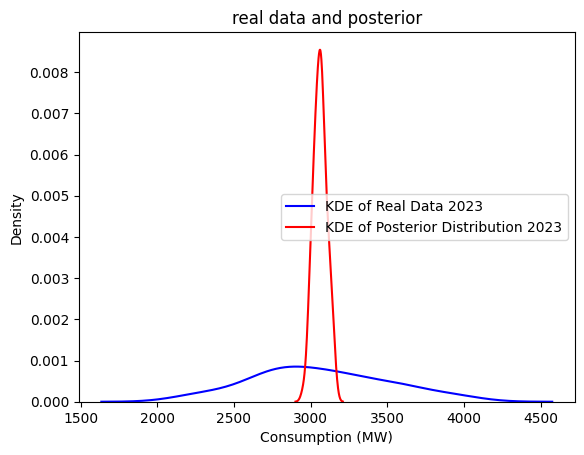

In [144]:
# selection of a region
region = "Bretagne"
df_regionB = df[df.region == region]

# Assuming 'date' is in datetime format
df_regionB['date'] = pd.to_datetime(df_regionB['date'])

# Calculate the day of the year
df_regionB['year'] = df_regionB['date'].dt.year

df_regionB = df_regionB[df_regionB['year'] >= 2022]

# Calculate the day of the year
df_regionB['day_of_year'] = df_regionB['date'].dt.dayofyear

# Define the range for winter days (from day 356 to day 80)
winter_data = df_regionB[((df_regionB['day_of_year'] >= 356) & (df_regionB['year'] == 2022)) | ((df_regionB['day_of_year'] <= 80)& (df_regionB['year'] == 2023))]

# Drop the 'day_of_year' column if you don't need it
winter_dataB = winter_data.drop(columns=['day_of_year'])

winter_dataB = list(winter_dataB['consumption'])

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter the data for the year 2023
real_data_2023 = df[df['date'].dt.year == 2023]['consumption']

results_2023 = results_df[results_df['Year'] == 2023]

# Extract the posterior mean and variance for 2023
posterior_mean_2023 = results_2023['Posterior_Mean'].values[0]
posterior_variance_2023 = results_2023['Posterior_Variance'].values[0]
print(posterior_variance_2023)

x = norm.rvs(loc=posterior_mean_2023, scale=np.sqrt(posterior_variance_2023), size=len(winter_dataB), random_state=0)

# Calculate the Kernel Density Estimate (KDE) for the real data in 2023
kde = sns.kdeplot(winter_dataB, color='blue', label='KDE of Real Data 2023')
sns.kdeplot(x, label='KDE of Posterior Distribution 2023', color='red')
plt.title('real data and posterior')
plt.xlabel("Consumption (MW)")
plt.legend()
plt.show()

4. Discuss the results, comparing to those obtained in part A.

Your answer: We can observe that the mean is pretty much similar to the one that can be appreciated on the kde of the real data, but the variance is actually difference in around 50% from the one obatined in part A, so that the posterior distribution is a lot more concentrated around the mean

## D. Hypothesis testing

Consider the region Bretagne. While the standard deviation is equal to 400MW in winter, you would like to test the hypothesis that it was 500MW in 2023. The mean is supposed to be known and equal to 3200MW.
1. Propose a statistical test at level $\alpha$.

Your answer:

$$
H_{0} : \sigma_{0} = 400
$$

$$ H_{1} : \sigma_{1} = 500 $$

$$
p_{\theta}(x) = \prod_{i=1}^{n} \frac{1}{{\sigma \sqrt{2\pi}}} e^{-\frac{{(x_{i} - \mu)^2}}{{2\sigma^2}}} \propto e^{\sum_{i=1}^{n} -\frac{{(x_{i} - \mu)^2}}{{2\sigma^2}}}
$$

$$
\frac{p_{1}(x)}{p_{0}(x)} \propto e^{\sum_{i=1}^{n} -\frac{{(x_{i} - \mu)^2}}{{2\sigma_{1}^2}} +\frac{{(x_{i} - \mu)^2}}{{2\sigma_{0}^2}}}
$$
$$
\propto e^{-\frac{1}{2}(\frac{1}{\sigma_{1}^2}-\frac{1}{\sigma_{0}^2})\sum_{i=1}^{n} {{(x_{i} - \mu)^2}}{}}
$$
$$
\propto e^{\frac{1}{2}(\frac{1}{\sigma_{0}^2}-\frac{1}{\sigma_{1}^2})\sum_{i=1}^{n} {{(x_{i} - \mu)^2}}{}}
$$
since
$$
\sigma{1}>\sigma{0} \hspace{1cm} \frac{1}{\sigma_{0}^2}>\frac{1}{\sigma_{1}^2} \hspace{1cm} -> \frac{1}{\sigma_{0}^2}-\frac{1}{\sigma_{1}^2} >0
$$

so that the likelihood ration is an incrasing function of x so the test has the form

$$
\delta(x) = 1_{\left\{\sum_{i=1}^{n}(x_{i}-\mu)^{2}>c\right\}}
$$

now since

$$
x \sim \mathcal{N}(\mu, \sigma_{0}^2)
$$

if we do

$$
K = \frac{(x-\mu)}{\sigma_{0}} \hspace{1cm} -> k\sim \mathcal{N}(0, 1)
$$

if we isolate $(X-\mu)$ square we get

$$
(x-\mu)^2 = k^2\sigma_{0}^2
$$
$$
\sum_{i=1}^{n}(x_{i}-\mu)^{2} = \sigma_{0}^2\sum_{i=1}^{n}k_{i}^2
$$

and by definition we know that if $X_{1}, ..., X_{m}$ are independent, standard normal random variables, then the sum of their squares, is distributed according to the chi-squared distribution with m degrees of freedom. so

$$
\sum_{i=1}^{n}k_{i}^2 \sim \chi^2(n)
$$

then the test is

$$
\delta(x) = 1_{\left\{\sum_{i=1}^{n}(x_{i}-\mu)^{2}>c\right\}}
$$
$$
\hspace{1cm} = 1_{\left\{\sigma_{0}^2\sum_{i=1}^{n}k_{i}^2>c\right\}}
$$
$$
\hspace{1cm} = 1_{\left\{\sum_{i=1}^{n}k_{i}^2>\frac{c}{\sigma_{0}^2}\right\}}
$$

where

$$
P\left(k_{i}^2 \leq \frac{c}{\sigma_{0}^2} \right) = 1 - \alpha
$$

$$
Q(1-\alpha) = \frac{c}{\sigma_0^2}
$$

where Q is the quantile function of the chi-squared distribution. We can finally express:

$$
c = \sigma_0^2 Q(1-\alpha)
$$


2. Provide the result of this test for $\alpha=1\%$.

In [133]:


#get the data
Bretagne = "Bretagne"
df_Bretagne = df[df.region == Bretagne]
mask = (df_Bretagne['date'] >= "2022-12-22") & (df_Bretagne['date'] <= "2023-03-21")
df_Bretagne_winter_2022_2023 = df_Bretagne[mask]
consumptionB = df_Bretagne_winter_2022_2023["consumption"]


mean = 3200

#let's calculate the sum of the square of the differences
k2 = sum((consumptionB - mean)**2)




parameter = 0.01
stdv0 = 400
#now let's calculate the critical value
c =  chi2.ppf(q=(1-parameter), df=90)* (stdv0**2)

if k2 > c:
  print('since ' + str(k2) + ' > ' + str(c) + ' we reject the null hypothesis')
else:
  print('since ' + str(k2) + ' <= ' + str(c) + ' we fail to reject the null hypothesis')


since 18736029 <= 19858610.989779405 we fail to reject the null hypothesis


## E. Testing independence

Consider the power consumption in Bretagne and Provence-Alpes-Côte d'Azur in winter.

1. Visualize the joint distribution of power consumption in these 2 regions using seaborn.

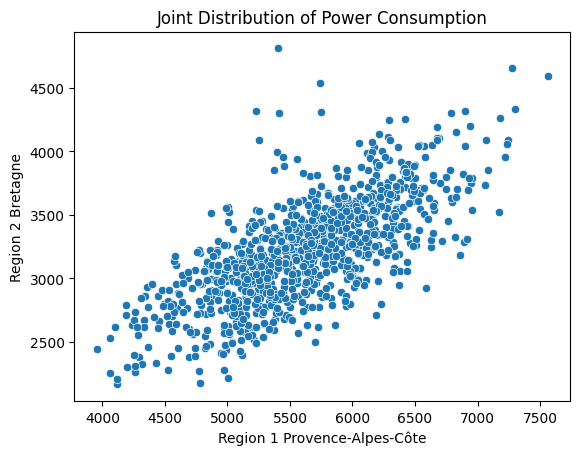

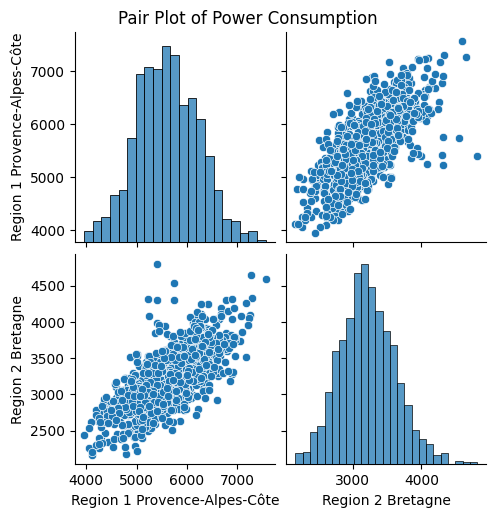

In [134]:
# selection of a region
region = "Bretagne"
df_regionB = df[df.region == region]

# Assuming 'date' is in datetime format
df_regionB['date'] = pd.to_datetime(df_regionB['date'])

# Calculate the day of the year
df_regionB['day_of_year'] = df_regionB['date'].dt.dayofyear

# Define the range for winter days (from day 356 to day 80)
winter_data = df_regionB[(df_regionB['day_of_year'] >= 356) | (df_regionB['day_of_year'] <= 80)]

# Drop the 'day_of_year' column if you don't need it
winter_dataB = winter_data.drop(columns=['day_of_year'])

consumptionB = list(winter_dataB['consumption'])

region = "Provence-Alpes-Côte d'Azur"
df_regionA = df[df.region == region]



# Assuming 'date' is in datetime format
df_regionA['date'] = pd.to_datetime(df_regionA['date'])

# Calculate the day of the year
df_regionA['day_of_year'] = df_regionA['date'].dt.dayofyear

# Define the range for winter days (from day 356 to day 80)
winter_dataA = df_regionA[(df_regionA['day_of_year'] >= 356) | (df_regionA['day_of_year'] <= 80)]

# Drop the 'day_of_year' column if you don't need it
winter_dataA = winter_dataA.drop(columns=['day_of_year'])

consumptionA = list(winter_dataA['consumption'])


# Create a DataFrame
dfp = pd.DataFrame({'Region 1 Provence-Alpes-Côte': consumptionA,
                   'Region 2 Bretagne': consumptionB})

# Scatter plot
sns.scatterplot(x='Region 1 Provence-Alpes-Côte', y='Region 2 Bretagne', data=dfp)
plt.title('Joint Distribution of Power Consumption')
plt.show()

# Pair plot (scatter plot matrix)
sns.pairplot(dfp)
plt.suptitle('Pair Plot of Power Consumption', y=1.02)
plt.show()



2. Do you think the power consumption in these two regions is independent?

Your answer:  Guided only by the given graph of the join distribution, i can see a corelation and I may believe that they are dependent since a concentration towards a straight line can be observed, but it's necessary to do a hypothesis test to give conclusion.

3. Propose a chi-2 test for the independence of the power consumption in these two regions at level $\alpha$.

Your answer:

Since length(number of observations from Bretagne) = 982 = length(number of observations from Provence-Alpes-Côte d'Azur) = n

$$
(X_{1},Y_{1}),\ldots,(X_{n},Y_{n})
$$

we would like to test the null hypothesis

$$H_0 = \{X \perp Y\}$$

agains

$$H_1 = \{X \not\perp Y\}$$

Being

$$A_{1},\ldots,A_{k}$$
$$B_{1},\ldots,B_{m}$$

the partitions of the corresponding values $(X,Y)$

we define

$$T(X,Y) = \sum_{i,j}{\frac{(N_{ij} - \frac{N_i N_j}{n})^2}{\frac{N_i N_j}{n}}}$$

where

$N_{ij} = \sum_{t=1}^n{1_{\{X_t \in A_i , Y_t \in B_j \}}} $ , $N_{i} = \sum_{t=1}^n{1_{\{X_t \in A_i\}}}$ , $N_{j} = \sum_{t=1}^n{1_{\{Y_t \in B_j \}}}$

that since the number of observations
$$n>>1$$

we say that

$$T(X,Y) \sim \chi^2((K-1)(L-1))$$

then we propose the following chi-2 test for the independence of the power consumption in these two regions at level $\alpha$.

$$\delta(x,y) = 1_{\{T(x,y)>c\}}$$

where

$$ \alpha = P_{0}(T(X,Y)>c)$$

and $ c = Q(1 - \alpha) $ where $Q$ is the quantile of the $\chi^2((K-1)(L-1)) $



4. Give the result of this test for $\alpha=1\%$.

In [135]:

consumptionA = sorted(consumptionA)
consumptionB = sorted(consumptionB)

numberOfPartitions = 10
#Doing partitions of list
partitionA = np.linspace(consumptionA[0], consumptionA[-1], numberOfPartitions)
partitionB = np.linspace(consumptionB[0], consumptionB[-1], numberOfPartitions)


#creating contingency tables

table = np.zeros((numberOfPartitions,numberOfPartitions))
for x in range(len(consumptionA)):
  row = 0
  for y in range(len(partitionA)):
    if consumptionA[x] <= partitionA[y]:
      row = y
      break
  column = 0
  for z in range(len(partitionB)):
    if consumptionB[x] <= partitionB[z]:
      column = z
      break
  table[row][column] += 1



print(table)
#let's calculate T(X,Y)

txy = 0
for x in range(len(partitionA)):
  for y in range(len(partitionB)):
    column_values = [sublist[y] for sublist in table]
    txy += ((table[x][y]-((sum(table[x])*sum(column_values))/len(consumptionA)))**2)/((sum(table[x])*sum(column_values))/len(consumptionA))

# find c
level = 0.01
c = chi2.ppf(1-level, df=(numberOfPartitions-1)**2)

if txy > c:
  print('since ' + str(txy) + ' > ' + str(c) + ' then H0 is rejected')
else:
  print('since ' + str(txy) + ' <= ' + str(c) + ' then H0 is not rejected')




[[  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  22.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   4.  48.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  46. 117.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  91. 136.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 167.  61.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 144.  31.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  66.  14.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  21.   4.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   5.   4.]]
since 5295.894778054456 > 113.51241047036046 then H0 is rejected


## F. Confidence intervals

Consider the region Bretagne in winter.

1. Provide a confidence interval at level $\alpha=95\%$ for the mean power consumption.

In [136]:
# selection of a region
region = "Bretagne"
df_regionB = df[df.region == region]

# Assuming 'date' is in datetime format
df_regionB.loc[:,'date'] = pd.to_datetime(df_regionB['date'])

# Calculate the day of the year
df_regionB.loc[:,'day_of_year'] = df_regionB['date'].dt.dayofyear

# Define the range for winter days (from day 356 to day 80)
winter_data = df_regionB[(df_regionB['day_of_year'] >= 356) | (df_regionB['day_of_year'] <= 80)]

# Drop the 'day_of_year' column if you don't need it
winter_dataB = winter_data.drop(columns=['day_of_year'])

consumptionB = list(winter_dataB['consumption'])

#calculate the mean
mean = sum(consumptionB) / len(consumptionB)

# calculate standard Deviation for Bretagne

sumi = 0
for value in consumptionB:
  sumi += (value - mean)**2
standardDeviation = ((sumi/(len(consumptionB)-1))**(1/2))

parameter = 0.05
#let's calculate c
c = norm.ppf(1-parameter/2)

#calculate intervals
interval = (c*standardDeviation)/((len(consumptionB)**0.5))

lower = mean-interval
upper = mean+interval
print('The confidence interval at level 95% for the mean power consumption is [' + str(lower) + ' , ' + str(upper) + ']')


The confidence interval at level 95% for the mean power consumption is [3189.431793533456 , 3240.576353106055]


2. Give the result of a Student test at level $5\%$ for the null hypothesis that the mean consumption in 2023 is equal to 3100MW.

In [145]:
# selection of a region
region = "Bretagne"
df_regionB = df[df.region == region]

# Assuming 'date' is in datetime format
df_regionB['date'] = pd.to_datetime(df_regionB['date'])

# Calculate the day of the year
df_regionB['year'] = df_regionB['date'].dt.year


df_regionB = df_regionB[df_regionB['year'] >= 2022]

# Calculate the day of the year
df_regionB['day_of_year'] = df_regionB['date'].dt.dayofyear

# Define the range for winter days (from day 356 to day 80)
winter_data = df_regionB[((df_regionB['day_of_year'] <= 80) & (df_regionB['year'] == 2023))| (df_regionB['day_of_year'] >= 356)]

# Drop the 'day_of_year' column if you don't need it
winter_dataB = winter_data.drop(columns=['day_of_year'])

consumptionB = list(winter_dataB['consumption'])

#calculate the mean
mean = sum(consumptionB) / len(consumptionB)

# calculate standard Deviation for Bretagne

sumi = 0
for value in consumptionB:
  sumi += (value - mean)**2
standardDeviation = ((sumi/(len(consumptionB)-1))**(1/2))

parameter = 0.05
#let's calculate c
c = norm.ppf(1-parameter/2)

#calculate intervals
interval = (c*standardDeviation)/((len(consumptionB)**0.5))

lower = mean-interval
upper = mean+interval
print('The confidence interval at level 95% for the mean power consumption is [' + str(lower) + ' , ' + str(upper) + ']')



h0 =3100
#let's calculate the t-value

t_value = ((mean-h0)*(len(consumptionB)**0.5))/standardDeviation

#let's calculate c
c = t.ppf(1-parameter/2, len(consumptionB)-1)

if t_value >= c:
  print('since t=' + str(t_value) + ' > c=' + str(c) + ' we reject the null hypothesis')
else:
  print('since t=' + str(t_value) + ' <= c=' + str(c) + ' we fail to reject the null hypothesis')


The confidence interval at level 95% for the mean power consumption is [2967.9469338309636 , 3148.119732835703]
since t=-0.9130474263842759 <= c=1.9869786993737677 we fail to reject the null hypothesis
